In [1]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import KNNImputer

In [2]:
df = pd.read_csv(r"C:\Users\USER\Documents\DS12\my_project\cilmate\Coronel_Pacheco_Clean.csv")

In [3]:
pd.set_option('display.max_columns', None)
df.head()

,Unnamed: 0,city,medication_date,total_daily_rainfall_aut_mm,daily_average_atmospheric_pressure_aut_m_b,average_daily_dew_point_temp_c,max_daily_temp_c,average_daily_temp_c,min_daily_temp_c,average_daily_air_relative_humidity_aut,minimum_daily_air_humidity_aut,wind_max_daily_gust_ms,wind_average_daily_speed_ms,x
0,1,Coronel_Pacheco,16/10/2012,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,Coronel_Pacheco,17/10/2012,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,Coronel_Pacheco,18/10/2012,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,Coronel_Pacheco,19/10/2012,NaN,NaN,NaN,30.3,NaN,NaN,NaN,41.0,9.5,NaN,NaN
4,5,Coronel_Pacheco,20/10/2012,10.2,966.583333,16.6625,30.3,21.683333,16.7,76.0,40.0,11.9,1.583333,NaN


In [4]:
df.describe(include = "all")

,Unnamed: 0,city,medication_date,total_daily_rainfall_aut_mm,daily_average_atmospheric_pressure_aut_m_b,average_daily_dew_point_temp_c,max_daily_temp_c,average_daily_temp_c,min_daily_temp_c,average_daily_air_relative_humidity_aut,minimum_daily_air_humidity_aut,wind_max_daily_gust_ms,wind_average_daily_speed_ms,x
count,2634.000000,2634,2634,2574.000000,2538.000000,2506.000000,2595.000000,2570.000000,2595.000000,2572.000000,2593.000000,2595.000000,2580.000000,0.0
unique,NaN,1,2634,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,Coronel_Pacheco,24/01/2016,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,2634,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,1317.500000,NaN,NaN,3.571639,967.670870,17.592094,29.970366,22.609062,17.737881,75.872285,45.723486,7.214913,1.379154,NaN
std,760.514628,NaN,NaN,9.723313,3.791118,3.169623,3.999065,3.198725,3.899687,8.283780,13.004165,2.613705,0.294503,NaN
min,1.000000,NaN,NaN,0.000000,956.908333,6.825000,17.100000,12.800000,5.200000,46.625000,12.000000,2.300000,0.633333,NaN
25%,659.250000,NaN,NaN,0.000000,965.004167,15.263542,27.200000,20.112500,15.000000,70.375000,37.000000,5.500000,1.173958,NaN
50%,1317.500000,NaN,NaN,0.000000,967.185416,18.110416,30.200000,23.018750,18.500000,76.312500,44.000000,6.700000,1.350000,NaN
75%,1975.750000,NaN,NaN,1.000000,970.023958,20.115625,32.800000,25.020471,20.600000,81.718750,54.000000,8.200000,1.570833,NaN


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2634 entries, 0 to 2633
Data columns (total 14 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   Unnamed: 0                                  2634 non-null   int64  
 1   city                                        2634 non-null   object 
 2   medication_date                             2634 non-null   object 
 3   total_daily_rainfall_aut_mm                 2574 non-null   float64
 4   daily_average_atmospheric_pressure_aut_m_b  2538 non-null   float64
 5   average_daily_dew_point_temp_c              2506 non-null   float64
 6   max_daily_temp_c                            2595 non-null   float64
 7   average_daily_temp_c                        2570 non-null   float64
 8   min_daily_temp_c                            2595 non-null   float64
 9   average_daily_air_relative_humidity_aut     2572 non-null   float64
 10  minimum_dail

In [6]:
df.drop(columns=['Unnamed: 0', 'x'], inplace = True)

In [7]:
#import sweetviz as sv
#report = sv.analyze(df)
#report.show_html('Coronel_Pacheco_report.html')

In [8]:
corrMatrix = df.corr(method = 'spearman')
corrMatrix.style.background_gradient(cmap='coolwarm')

,total_daily_rainfall_aut_mm,daily_average_atmospheric_pressure_aut_m_b,average_daily_dew_point_temp_c,max_daily_temp_c,average_daily_temp_c,min_daily_temp_c,average_daily_air_relative_humidity_aut,minimum_daily_air_humidity_aut,wind_max_daily_gust_ms,wind_average_daily_speed_ms
total_daily_rainfall_aut_mm,1.000000,-0.235509,0.339515,-0.169271,0.013453,0.261781,0.471377,0.433602,0.021292,-0.244362
daily_average_atmospheric_pressure_aut_m_b,-0.235509,1.000000,-0.669887,-0.538224,-0.658487,-0.598024,-0.013125,-0.013764,-0.321649,-0.086385
average_daily_dew_point_temp_c,0.339515,-0.669887,1.000000,0.462941,0.775898,0.908341,0.291512,0.335303,0.128240,-0.203596
max_daily_temp_c,-0.169271,-0.538224,0.462941,1.000000,0.824049,0.431337,-0.512452,-0.605754,0.329280,0.273688
average_daily_temp_c,0.013453,-0.658487,0.775898,0.824049,1.000000,0.823394,-0.312305,-0.209533,0.292140,0.156321
min_daily_temp_c,0.261781,-0.598024,0.908341,0.431337,0.823394,1.000000,0.076118,0.268102,0.204941,-0.068969
average_daily_air_relative_humidity_aut,0.471377,-0.013125,0.291512,-0.512452,-0.312305,0.076118,1.000000,0.809884,-0.298576,-0.576335
minimum_daily_air_humidity_aut,0.433602,-0.013764,0.335303,-0.605754,-0.209533,0.268102,0.809884,1.000000,-0.243537,-0.471082
wind_max_daily_gust_ms,0.021292,-0.321649,0.128240,0.329280,0.292140,0.204941,-0.298576,-0.243537,1.000000,0.606776
wind_average_daily_speed_ms,-0.244362,-0.086385,-0.203596,0.273688,0.156321,-0.068969,-0.576335,-0.471082,0.606776,1.000000


#### Turn "medication_date" to Date

In [9]:
df['Date'] = df["medication_date"]
df['Date'] = pd.to_datetime(df['Date'], dayfirst=True, infer_datetime_format=True)
df['year'] = df['Date'].dt.year
df["month"] = df['Date'].dt.month
df['week'] = df['Date'].dt.isocalendar().week
df.tail()

,city,medication_date,total_daily_rainfall_aut_mm,daily_average_atmospheric_pressure_aut_m_b,average_daily_dew_point_temp_c,max_daily_temp_c,average_daily_temp_c,min_daily_temp_c,average_daily_air_relative_humidity_aut,minimum_daily_air_humidity_aut,wind_max_daily_gust_ms,wind_average_daily_speed_ms,Date,year,month,week
2629,Coronel_Pacheco,28/12/2019,0.0,966.833333,20.458333,33.8,27.545833,23.1,67.833333,36.0,6.1,1.375000,2019-12-28,2019,12,52
2630,Coronel_Pacheco,29/12/2019,0.0,965.625000,19.725000,33.4,27.216667,21.2,65.958333,34.0,8.0,1.545833,2019-12-29,2019,12,52
2631,Coronel_Pacheco,30/12/2019,2.4,963.608333,19.475000,33.7,26.795833,20.7,67.833333,33.0,10.5,1.312500,2019-12-30,2019,12,1
2632,Coronel_Pacheco,31/12/2019,0.2,962.750000,20.275000,33.3,27.054167,22.1,69.250000,37.0,7.3,1.333333,2019-12-31,2019,12,1
2633,Coronel_Pacheco,01/01/2020,0.0,961.108333,21.229167,34.9,27.170833,21.8,72.791667,40.0,7.7,1.491667,2020-01-01,2020,1,1


### Testing for Outliers

In [10]:
col_names = list(df.columns)
col_names

['city',
 'medication_date',
 'total_daily_rainfall_aut_mm',
 'daily_average_atmospheric_pressure_aut_m_b',
 'average_daily_dew_point_temp_c',
 'max_daily_temp_c',
 'average_daily_temp_c',
 'min_daily_temp_c',
 'average_daily_air_relative_humidity_aut',
 'minimum_daily_air_humidity_aut',
 'wind_max_daily_gust_ms',
 'wind_average_daily_speed_ms',
 'Date',
 'year',
 'month',
 'week']

<AxesSubplot:xlabel='wind_average_daily_speed_ms'>

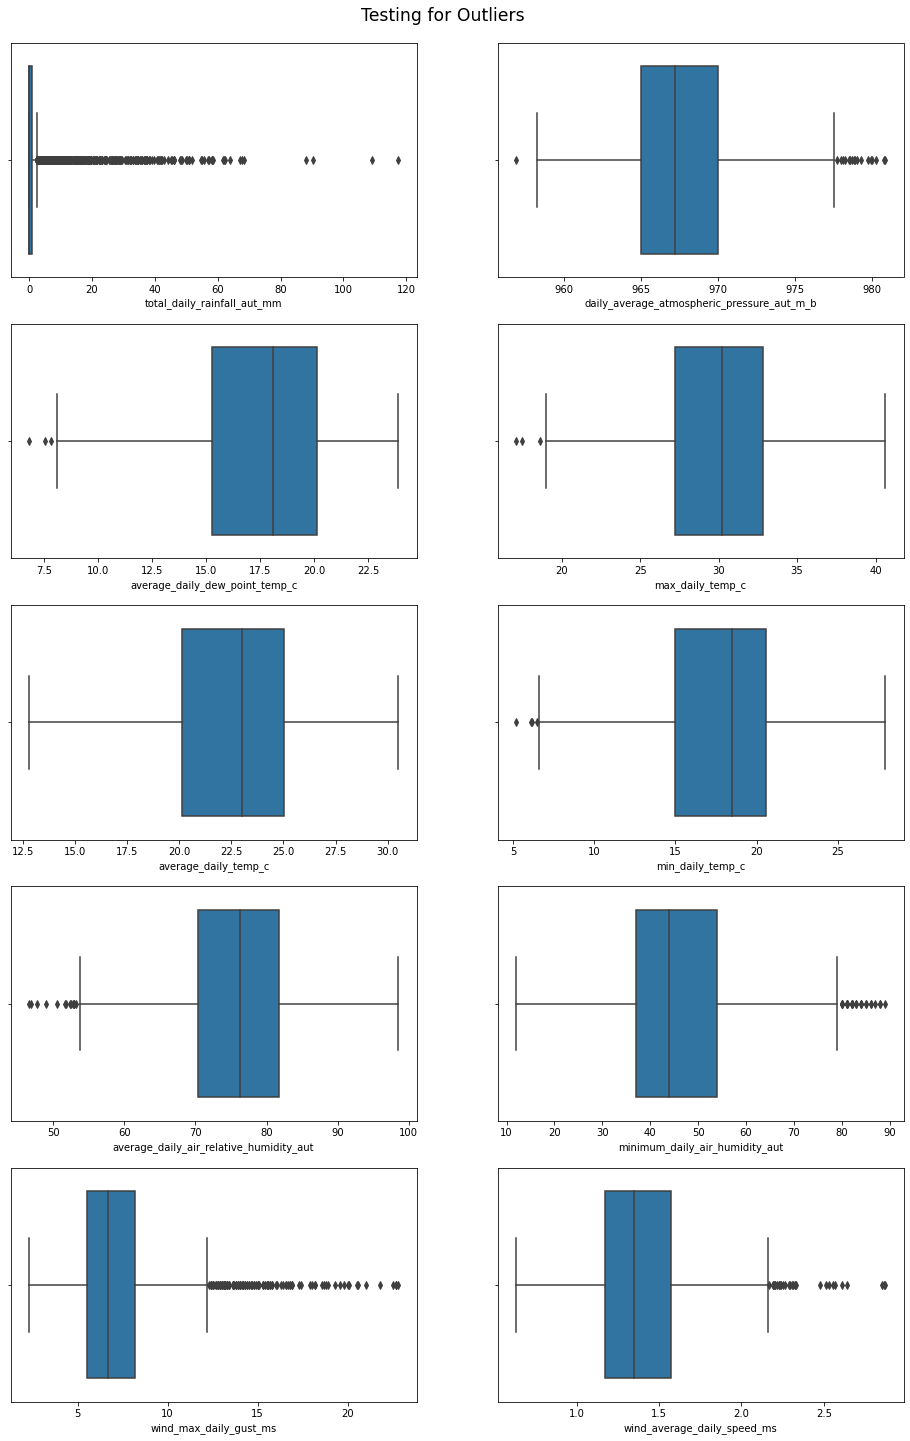

In [11]:
fig, axes = plt.subplots(5,2, figsize=(16,25))
fig.suptitle('Testing for Outliers', y= 0.9, fontsize =  'xx-large')
sns.boxplot(ax=axes[0, 0], x='total_daily_rainfall_aut_mm', data = df)
sns.boxplot(ax=axes[0, 1], x='daily_average_atmospheric_pressure_aut_m_b', data = df)
sns.boxplot(ax=axes[1, 0], x='average_daily_dew_point_temp_c', data = df)
sns.boxplot(ax=axes[1, 1], x='max_daily_temp_c', data = df)
sns.boxplot(ax=axes[2, 0], x='average_daily_temp_c', data = df)
sns.boxplot(ax=axes[2, 1], x='min_daily_temp_c', data = df)
sns.boxplot(ax=axes[3, 0], x='average_daily_air_relative_humidity_aut', data = df)
sns.boxplot(ax=axes[3, 1], x='minimum_daily_air_humidity_aut', data = df)
sns.boxplot(ax=axes[4, 0], x='wind_max_daily_gust_ms',  data = df)
sns.boxplot(ax=axes[4, 1], x='wind_average_daily_speed_ms', data = df)

<AxesSubplot:xlabel='year', ylabel='total_daily_rainfall_aut_mm'>

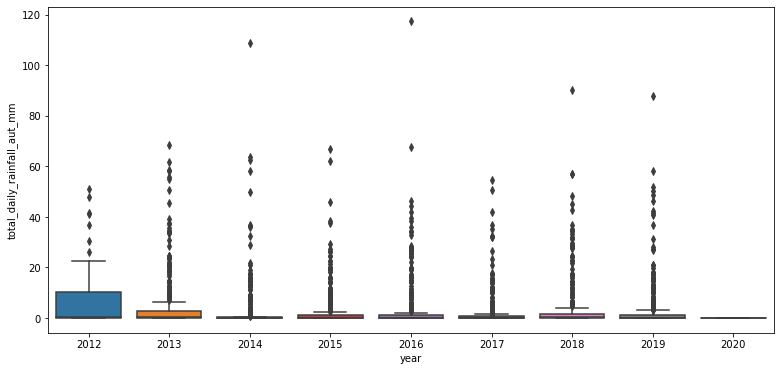

In [12]:
plt.figure(figsize=(13, 6))
sns.boxplot(y='total_daily_rainfall_aut_mm', x= 'year', data = df)

<AxesSubplot:xlabel='year', ylabel='min_daily_temp_c'>

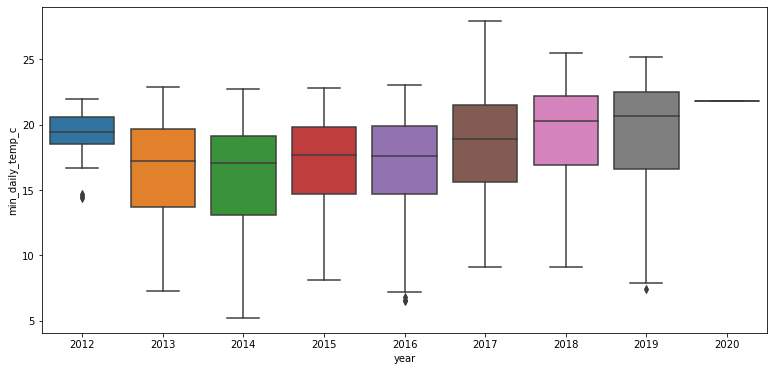

In [13]:
plt.figure(figsize=(13, 6))
sns.boxplot(y='min_daily_temp_c', x= 'year', data = df)

<AxesSubplot:xlabel='year', ylabel='max_daily_temp_c'>

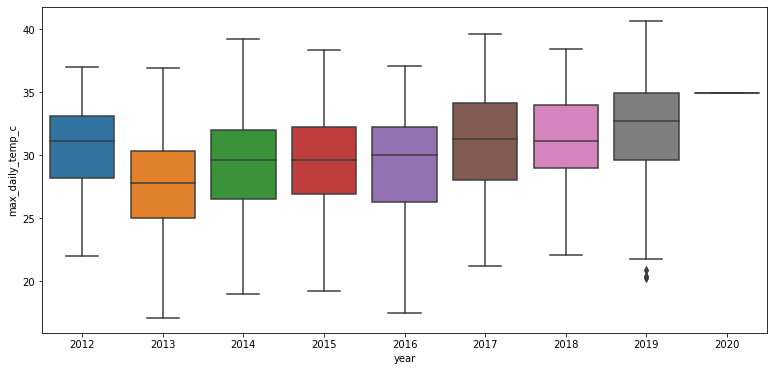

In [14]:
plt.figure(figsize=(13, 6))
sns.boxplot(y='max_daily_temp_c', x= 'year', data = df)

<AxesSubplot:xlabel='year', ylabel='average_daily_dew_point_temp_c'>

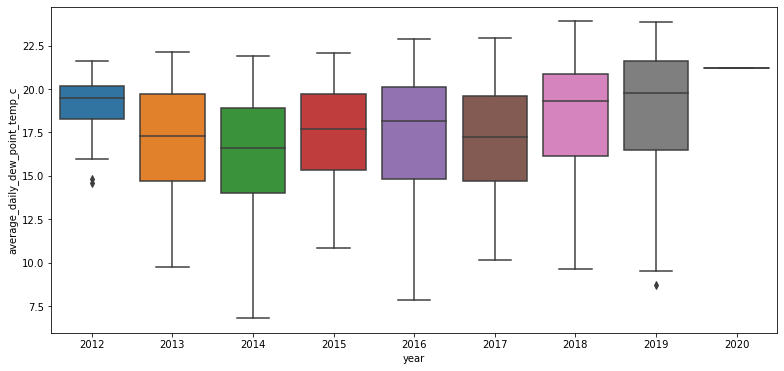

In [15]:
plt.figure(figsize=(13, 6))
sns.boxplot(y='average_daily_dew_point_temp_c', x= 'year', data = df)

<AxesSubplot:xlabel='year', ylabel='wind_average_daily_speed_ms'>

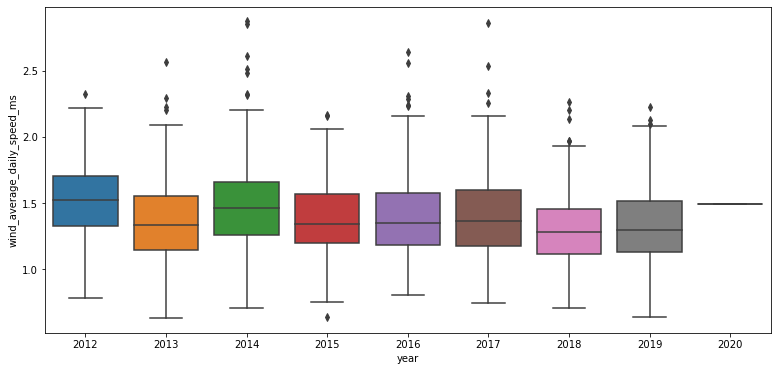

In [16]:
plt.figure(figsize=(13, 6))
sns.boxplot(y='wind_average_daily_speed_ms', x= 'year', data = df)

<AxesSubplot:xlabel='month', ylabel='minimum_daily_air_humidity_aut'>

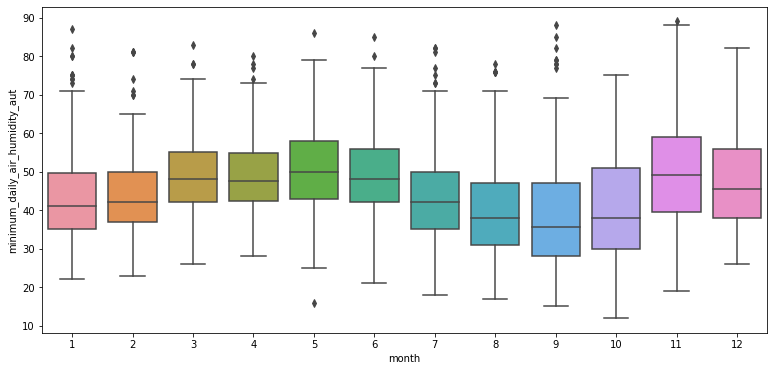

In [17]:
plt.figure(figsize=(13, 6))
sns.boxplot(y='minimum_daily_air_humidity_aut', x= 'month', data = df)

### Missing values

In [18]:
df.isnull().sum()

city                                            0
medication_date                                 0
total_daily_rainfall_aut_mm                    60
daily_average_atmospheric_pressure_aut_m_b     96
average_daily_dew_point_temp_c                128
max_daily_temp_c                               39
average_daily_temp_c                           64
min_daily_temp_c                               39
average_daily_air_relative_humidity_aut        62
minimum_daily_air_humidity_aut                 41
wind_max_daily_gust_ms                         39
wind_average_daily_speed_ms                    54
Date                                            0
year                                            0
month                                           0
week                                            0
dtype: int64

nulls range 1.5% - 5%

In [19]:
df_nulls = df.copy()

#set date as index
df_nulls = df_nulls.set_index('Date')

columns = list(df_nulls.columns)

for col in columns:
    new_col_name = col+"_nulls"
    df_nulls[new_col_name] = 0
    df_nulls.loc[(df_nulls[col].isnull()),[new_col_name]] = 1

df_nulls2 = df_nulls.copy()   

df_nulls.drop(columns=columns, inplace=True)

    
df_nulls.head()

,city_nulls,medication_date_nulls,total_daily_rainfall_aut_mm_nulls,daily_average_atmospheric_pressure_aut_m_b_nulls,average_daily_dew_point_temp_c_nulls,max_daily_temp_c_nulls,average_daily_temp_c_nulls,min_daily_temp_c_nulls,average_daily_air_relative_humidity_aut_nulls,minimum_daily_air_humidity_aut_nulls,wind_max_daily_gust_ms_nulls,wind_average_daily_speed_ms_nulls,year_nulls,month_nulls,week_nulls
Date,,,,,,,,,,,,,,,
2012-10-16,0,0,1,1,1,1,1,1,1,1,1,1,0,0,0
2012-10-17,0,0,1,1,1,1,1,1,1,1,1,1,0,0,0
2012-10-18,0,0,1,1,1,1,1,1,1,1,1,1,0,0,0
2012-10-19,0,0,1,1,1,0,1,1,1,0,0,1,0,0,0
2012-10-20,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


<AxesSubplot:ylabel='Date'>

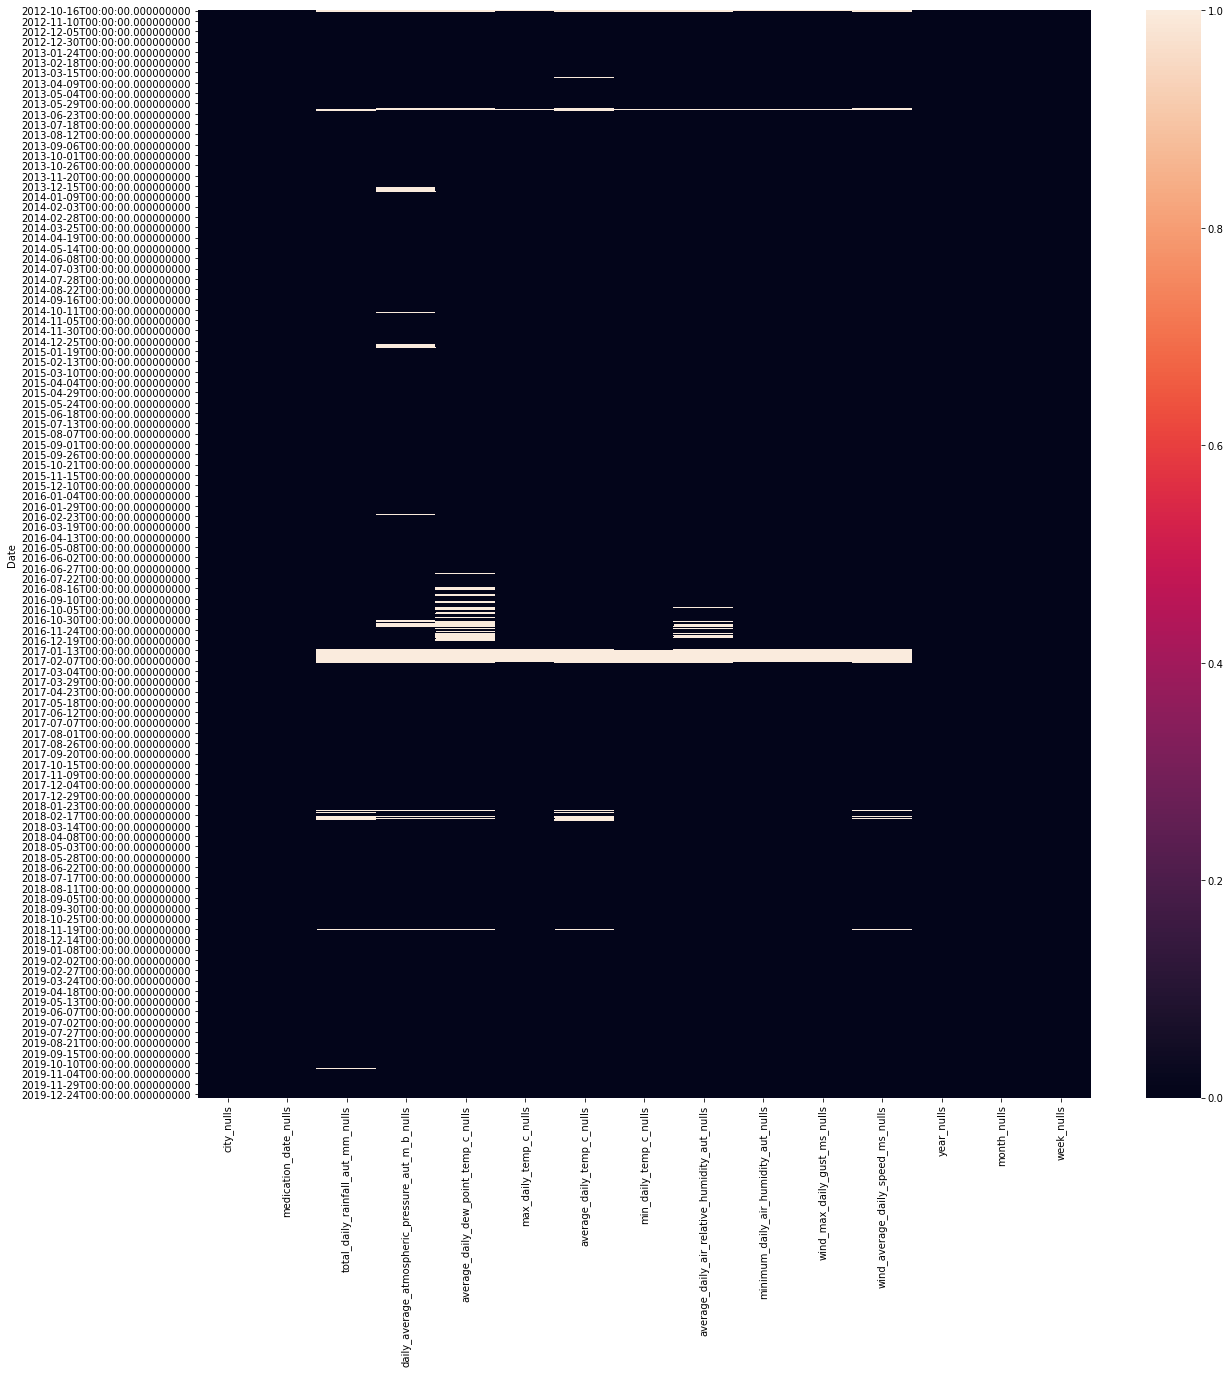

In [20]:
plt.figure(figsize=(20,20))
sns.heatmap(df_nulls)

In [21]:
df_copy2 = df.copy()

for col in df.columns:
    new_col_name = col+"_nulls"
    df_copy2[new_col_name] = 0
    df_copy2.loc[(df_copy2[col].isnull()),[new_col_name]] = 1
    
df_copy2.head()

,city,medication_date,total_daily_rainfall_aut_mm,daily_average_atmospheric_pressure_aut_m_b,average_daily_dew_point_temp_c,max_daily_temp_c,average_daily_temp_c,min_daily_temp_c,average_daily_air_relative_humidity_aut,minimum_daily_air_humidity_aut,wind_max_daily_gust_ms,wind_average_daily_speed_ms,Date,year,month,week,city_nulls,medication_date_nulls,total_daily_rainfall_aut_mm_nulls,daily_average_atmospheric_pressure_aut_m_b_nulls,average_daily_dew_point_temp_c_nulls,max_daily_temp_c_nulls,average_daily_temp_c_nulls,min_daily_temp_c_nulls,average_daily_air_relative_humidity_aut_nulls,minimum_daily_air_humidity_aut_nulls,wind_max_daily_gust_ms_nulls,wind_average_daily_speed_ms_nulls,Date_nulls,year_nulls,month_nulls,week_nulls
0,Coronel_Pacheco,16/10/2012,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2012-10-16,2012,10,42,0,0,1,1,1,1,1,1,1,1,1,1,0,0,0,0
1,Coronel_Pacheco,17/10/2012,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2012-10-17,2012,10,42,0,0,1,1,1,1,1,1,1,1,1,1,0,0,0,0
2,Coronel_Pacheco,18/10/2012,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2012-10-18,2012,10,42,0,0,1,1,1,1,1,1,1,1,1,1,0,0,0,0
3,Coronel_Pacheco,19/10/2012,NaN,NaN,NaN,30.3,NaN,NaN,NaN,41.0,9.5,NaN,2012-10-19,2012,10,42,0,0,1,1,1,0,1,1,1,0,0,1,0,0,0,0
4,Coronel_Pacheco,20/10/2012,10.2,966.583333,16.6625,30.3,21.683333,16.7,76.0,40.0,11.9,1.583333,2012-10-20,2012,10,42,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


(array([374., 215., 210., 217., 205., 213., 208., 199., 217., 448.]),
 array([ 1. ,  2.1,  3.2,  4.3,  5.4,  6.5,  7.6,  8.7,  9.8, 10.9, 12. ]),
 <BarContainer object of 10 artists>)

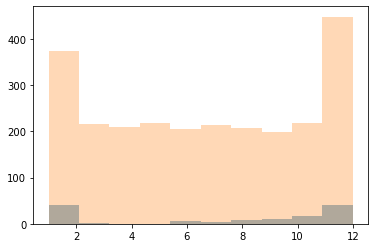

In [22]:
# test if dew point nulls are dont random in relation to the month

x1 = df_copy2.loc[df_copy2['average_daily_dew_point_temp_c_nulls']==1, 'month']
x0 =df_copy2.loc[df_copy2['average_daily_dew_point_temp_c_nulls']==0, 'month']
plt.hist(x1,alpha=0.5)
plt.hist(x0,alpha=0.3)

(array([  7.,  54., 117., 198., 278., 313., 456., 588., 362., 133.]),
 array([ 5.2,  7.2,  9.2, 11.2, 13.2, 15.2, 17.2, 19.2, 21.2, 23.2, 25.2]),
 <BarContainer object of 10 artists>)

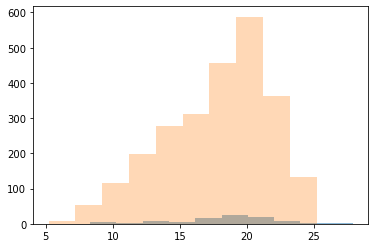

In [23]:
# test if dew point nulls are dont random in relation to the min temp

x1 = df_copy2.loc[df_copy2['average_daily_dew_point_temp_c_nulls']==1, 'min_daily_temp_c']
x0 =df_copy2.loc[df_copy2['average_daily_dew_point_temp_c_nulls']==0, 'min_daily_temp_c']
plt.hist(x1,alpha=0.5)
plt.hist(x0,alpha=0.3)

(array([2.252e+03, 1.340e+02, 5.400e+01, 2.900e+01, 1.800e+01, 7.000e+00,
        0.000e+00, 2.000e+00, 0.000e+00, 2.000e+00]),
 array([  0.  ,  11.74,  23.48,  35.22,  46.96,  58.7 ,  70.44,  82.18,
         93.92, 105.66, 117.4 ]),
 <BarContainer object of 10 artists>)

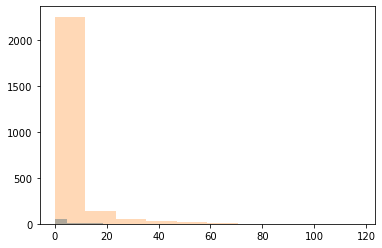

In [24]:
# test if dew point nulls are dont random in relation to the rain
 
x1 = df_copy2.loc[df_copy2['average_daily_dew_point_temp_c_nulls']==1, 'total_daily_rainfall_aut_mm']
x0 =df_copy2.loc[df_copy2['average_daily_dew_point_temp_c_nulls']==0, 'total_daily_rainfall_aut_mm']

plt.hist(x1,alpha=0.5)
plt.hist(x0,alpha=0.3)

(array([ 52., 326., 747., 670., 493., 182.,  42.,  16.,   6.,   3.]),
 array([0.633333, 0.857083, 1.080833, 1.304583, 1.528333, 1.752083,
        1.975833, 2.199583, 2.423333, 2.647083, 2.870833]),
 <BarContainer object of 10 artists>)

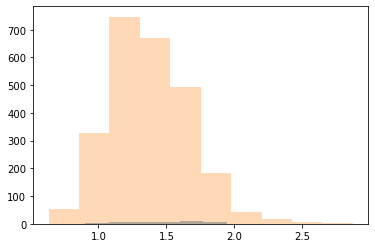

In [25]:
# test if pressure nulls are dont random in relation to the wind speed

x1 = df_copy2.loc[df_copy2['daily_average_atmospheric_pressure_aut_m_b_nulls']==1, 'wind_average_daily_speed_ms']
x0 =df_copy2.loc[df_copy2['daily_average_atmospheric_pressure_aut_m_b_nulls']==0, 'wind_average_daily_speed_ms']
plt.hist(x1,alpha=0.5)
plt.hist(x0,alpha=0.3)

Missing Mechanism appears to be MCAR, (probably due to equipment malfunction)

<AxesSubplot:title={'center':'Max temp'}>

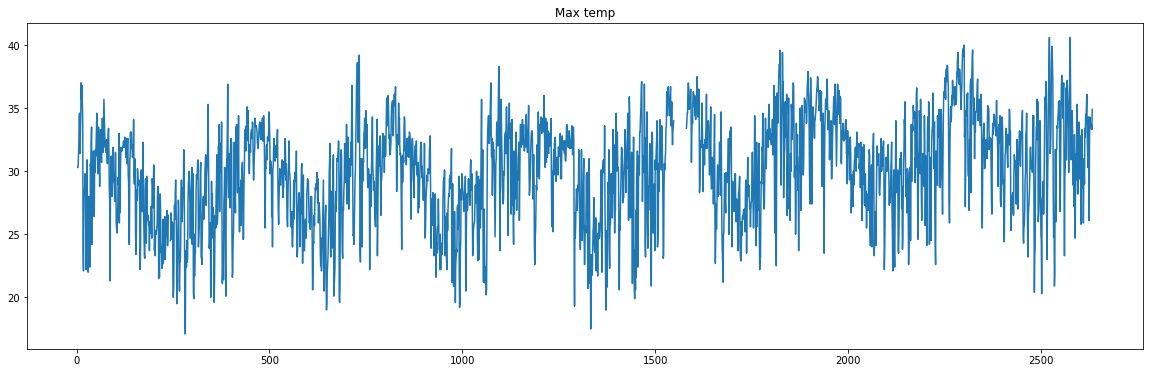

In [26]:
df['max_daily_temp_c'].plot(figsize=(20,6), title = "Max temp")

<AxesSubplot:>

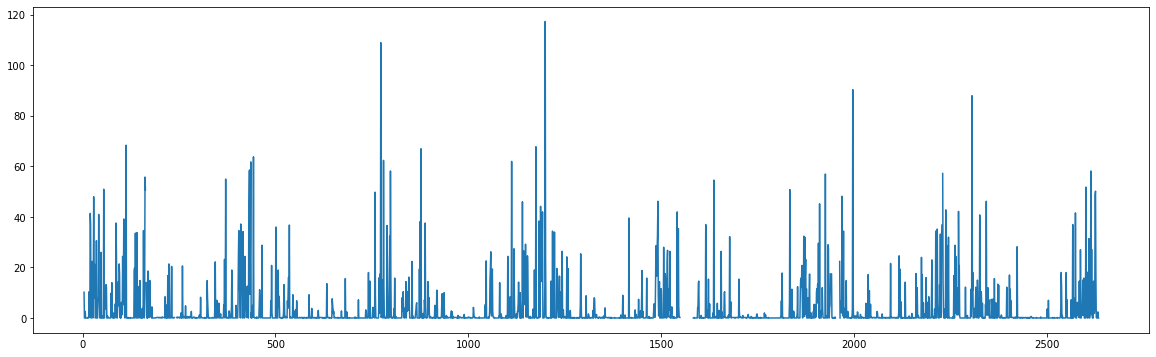

In [27]:
df['total_daily_rainfall_aut_mm'].plot(figsize=(20,6))

<AxesSubplot:>

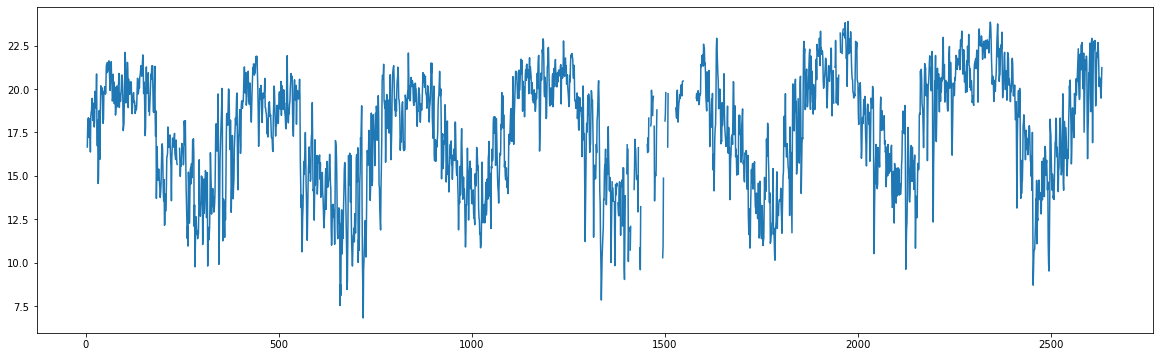

In [28]:
df['average_daily_dew_point_temp_c'].plot(figsize=(20,6))

-----------------------------
### Missing values treatment:
1. Use 'ffill' and 'bfill' in for when 1-2 rows missing
2. Drop rows where all climate data is missing
3. Use KNN to fill the remaining nulls


In [29]:
col_list = ['total_daily_rainfall_aut_mm',
       'daily_average_atmospheric_pressure_aut_m_b',
       'average_daily_dew_point_temp_c', 'max_daily_temp_c',
       'average_daily_temp_c', 'min_daily_temp_c',
       'average_daily_air_relative_humidity_aut',
       'minimum_daily_air_humidity_aut', 'wind_max_daily_gust_ms',
       'wind_average_daily_speed_ms']

In [30]:
df_clean = df.copy()

# fillna for single rows
df_clean.fillna(method = 'ffill', limit = 1, inplace = True)
df_clean.fillna(method = 'bfill', limit = 1, inplace = True)
df_clean.isnull().sum()

city                                           0
medication_date                                0
total_daily_rainfall_aut_mm                   46
daily_average_atmospheric_pressure_aut_m_b    71
average_daily_dew_point_temp_c                75
max_daily_temp_c                              34
average_daily_temp_c                          48
min_daily_temp_c                              34
average_daily_air_relative_humidity_aut       41
minimum_daily_air_humidity_aut                34
wind_max_daily_gust_ms                        34
wind_average_daily_speed_ms                   39
Date                                           0
year                                           0
month                                          0
week                                           0
dtype: int64

In [31]:
#drop rows

df_clean.dropna(how= 'all', subset = col_list, inplace = True)
df_clean.isnull().sum()

city                                           0
medication_date                                0
total_daily_rainfall_aut_mm                   14
daily_average_atmospheric_pressure_aut_m_b    39
average_daily_dew_point_temp_c                43
max_daily_temp_c                               2
average_daily_temp_c                          16
min_daily_temp_c                               2
average_daily_air_relative_humidity_aut        9
minimum_daily_air_humidity_aut                 2
wind_max_daily_gust_ms                         2
wind_average_daily_speed_ms                    7
Date                                           0
year                                           0
month                                          0
week                                           0
dtype: int64

<AxesSubplot:>

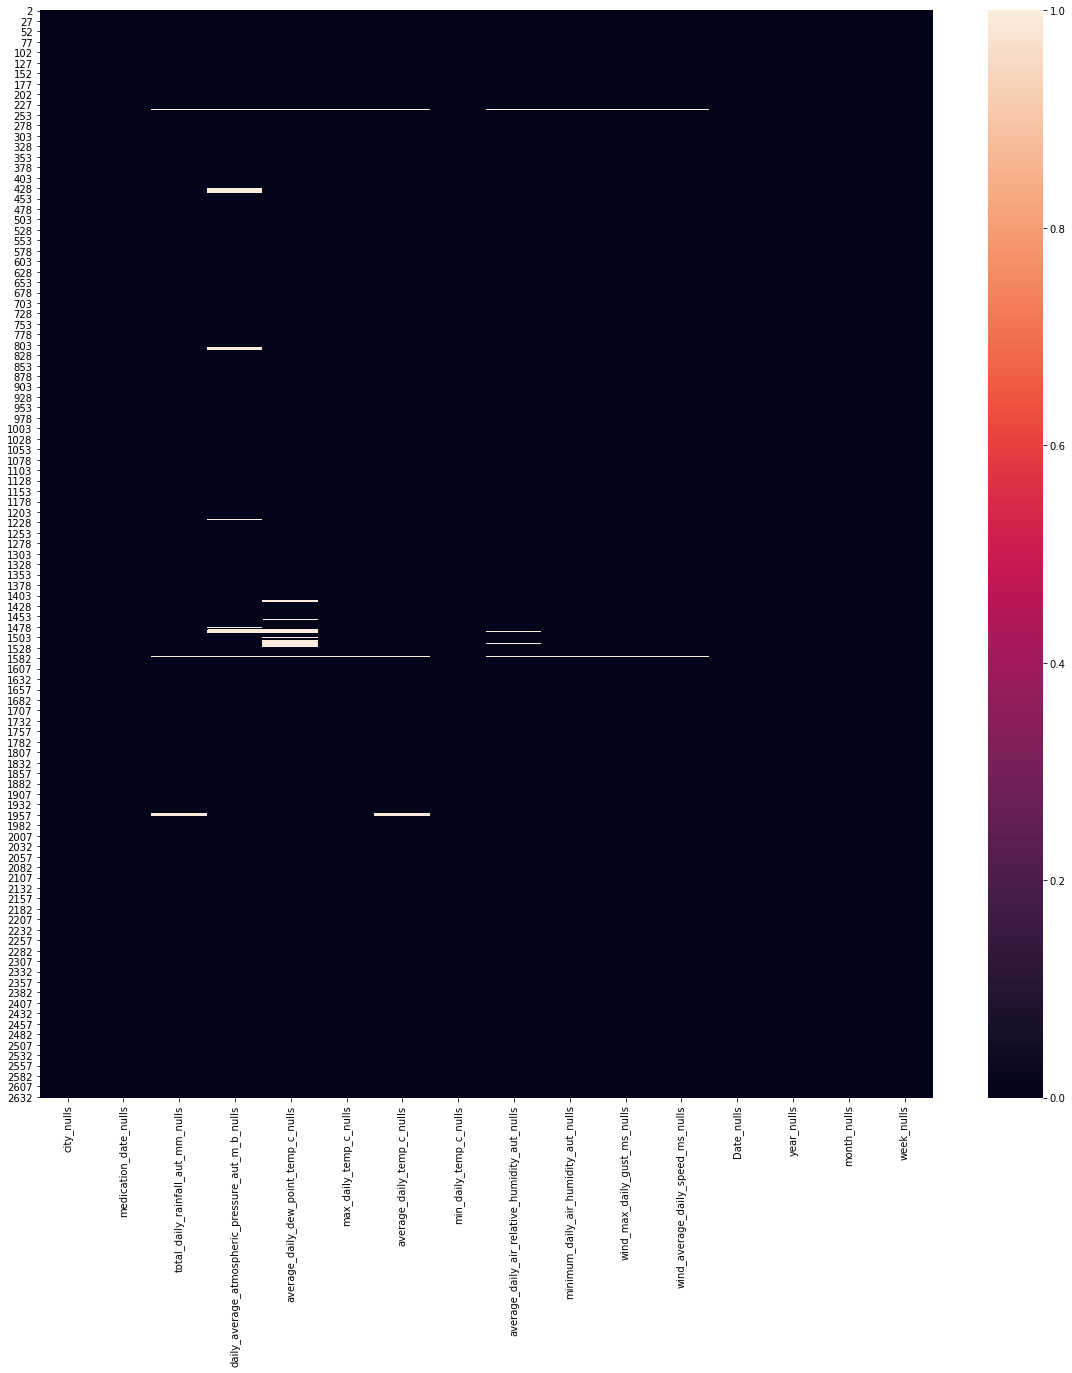

In [32]:
columns = list(df_clean.columns)
df_copy2 = df_clean.copy()

for col in df.columns:
    new_col_name = col+"_nulls"
    df_copy2[new_col_name] = 0
    df_copy2.loc[(df_copy2[col].isnull()),[new_col_name]] = 1
    
df_copy2.drop(columns=columns, inplace=True)
    
plt.figure(figsize=(20,20))
sns.heatmap(df_copy2)

In [33]:
imputer = KNNImputer(copy = False)
df_clean[col_list] = imputer.fit_transform(df_clean[col_list])


df_clean.isnull().sum()

city                                          0
medication_date                               0
total_daily_rainfall_aut_mm                   0
daily_average_atmospheric_pressure_aut_m_b    0
average_daily_dew_point_temp_c                0
max_daily_temp_c                              0
average_daily_temp_c                          0
min_daily_temp_c                              0
average_daily_air_relative_humidity_aut       0
minimum_daily_air_humidity_aut                0
wind_max_daily_gust_ms                        0
wind_average_daily_speed_ms                   0
Date                                          0
year                                          0
month                                         0
week                                          0
dtype: int64

In [34]:
df_clean.describe()

,total_daily_rainfall_aut_mm,daily_average_atmospheric_pressure_aut_m_b,average_daily_dew_point_temp_c,max_daily_temp_c,average_daily_temp_c,min_daily_temp_c,average_daily_air_relative_humidity_aut,minimum_daily_air_humidity_aut,wind_max_daily_gust_ms,wind_average_daily_speed_ms,year,month,week
count,2602.000000,2602.000000,2602.000000,2602.000000,2602.000000,2602.000000,2602.000000,2602.000000,2602.000000,2602.000000,2602.000000,2602.000000,2602.000000
mean,3.610423,967.618200,17.592386,29.972360,22.630595,17.744151,75.857545,45.744581,7.215880,1.379047,2015.876249,6.715219,27.379324
std,9.757422,3.771865,3.154004,3.998379,3.201432,3.901714,8.302806,13.008107,2.612476,0.293876,2.089699,3.466430,15.147952
min,0.000000,956.908333,6.825000,17.100000,12.800000,5.200000,46.625000,12.000000,2.300000,0.633333,2012.000000,1.000000,1.000000
25%,0.000000,964.983333,15.275000,27.200000,20.137500,15.000000,70.343750,37.000000,5.500000,1.175000,2014.000000,4.000000,14.000000
50%,0.000000,967.112500,18.091667,30.200000,23.052084,18.500000,76.250000,45.000000,6.700000,1.354167,2016.000000,7.000000,28.000000
75%,1.200000,969.932292,20.091667,32.800000,25.040625,20.600000,81.708333,54.000000,8.200000,1.570833,2018.000000,10.000000,41.000000
max,117.400000,980.820833,23.887500,40.600000,30.500000,27.900000,98.500000,89.000000,22.800000,2.870833,2020.000000,12.000000,53.000000


In [35]:
df.describe()

,total_daily_rainfall_aut_mm,daily_average_atmospheric_pressure_aut_m_b,average_daily_dew_point_temp_c,max_daily_temp_c,average_daily_temp_c,min_daily_temp_c,average_daily_air_relative_humidity_aut,minimum_daily_air_humidity_aut,wind_max_daily_gust_ms,wind_average_daily_speed_ms,year,month,week
count,2574.000000,2538.000000,2506.000000,2595.000000,2570.000000,2595.000000,2572.000000,2593.000000,2595.000000,2580.000000,2634.000000,2634.000000,2634.000000
mean,3.571639,967.670870,17.592094,29.970366,22.609062,17.737881,75.872285,45.723486,7.214913,1.379154,2015.884586,6.658694,27.134776
std,9.723313,3.791118,3.169623,3.999065,3.198725,3.899687,8.283780,13.004165,2.613705,0.294503,2.083786,3.491630,15.253662
min,0.000000,956.908333,6.825000,17.100000,12.800000,5.200000,46.625000,12.000000,2.300000,0.633333,2012.000000,1.000000,1.000000
25%,0.000000,965.004167,15.263542,27.200000,20.112500,15.000000,70.375000,37.000000,5.500000,1.173958,2014.000000,4.000000,14.000000
50%,0.000000,967.185416,18.110416,30.200000,23.018750,18.500000,76.312500,44.000000,6.700000,1.350000,2016.000000,7.000000,27.000000
75%,1.000000,970.023958,20.115625,32.800000,25.020471,20.600000,81.718750,54.000000,8.200000,1.570833,2018.000000,10.000000,41.000000
max,117.400000,980.820833,23.887500,40.600000,30.500000,27.900000,98.500000,89.000000,22.800000,2.870833,2020.000000,12.000000,53.000000


<AxesSubplot:>

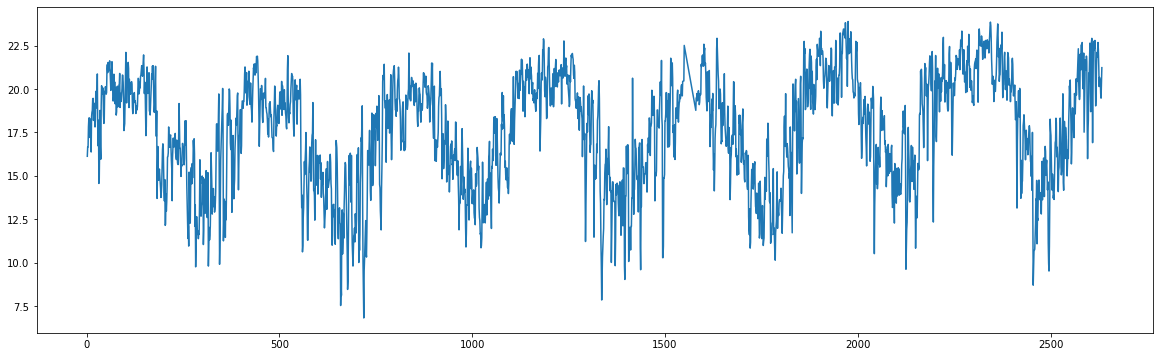

In [36]:
df_clean['average_daily_dew_point_temp_c'].plot(figsize=(20,6))

<AxesSubplot:>

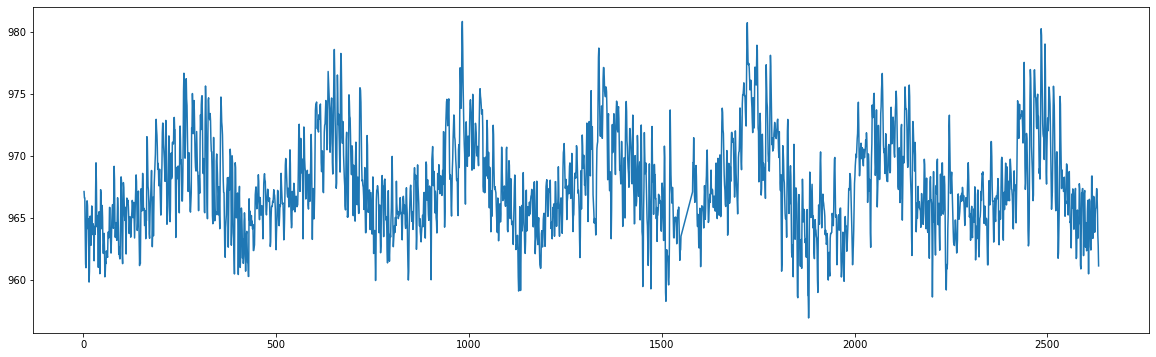

In [37]:
df_clean['daily_average_atmospheric_pressure_aut_m_b'].plot(figsize=(20,6))

Keep only rows with relevent dates. i.e. drop all rows with year < 2012

In [38]:
df_clean.drop(df[df['year'] < 2012].index, inplace = True)
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2602 entries, 2 to 2633
Data columns (total 16 columns):
 #   Column                                      Non-Null Count  Dtype         
---  ------                                      --------------  -----         
 0   city                                        2602 non-null   object        
 1   medication_date                             2602 non-null   object        
 2   total_daily_rainfall_aut_mm                 2602 non-null   float64       
 3   daily_average_atmospheric_pressure_aut_m_b  2602 non-null   float64       
 4   average_daily_dew_point_temp_c              2602 non-null   float64       
 5   max_daily_temp_c                            2602 non-null   float64       
 6   average_daily_temp_c                        2602 non-null   float64       
 7   min_daily_temp_c                            2602 non-null   float64       
 8   average_daily_air_relative_humidity_aut     2602 non-null   float64       
 9   minimum_

In [39]:
#fix problem of the number of last week of the year 

df_clean.loc[(df_clean['week'] == 1) & (df_clean['month'] == 12), 'year'] = df_clean['year'] +1
df_clean.loc[(df_clean['week'] >= 52) & (df_clean['month'] == 1), 'year'] = df_clean['year'] -1
df_clean.tail(10)

,city,medication_date,total_daily_rainfall_aut_mm,daily_average_atmospheric_pressure_aut_m_b,average_daily_dew_point_temp_c,max_daily_temp_c,average_daily_temp_c,min_daily_temp_c,average_daily_air_relative_humidity_aut,minimum_daily_air_humidity_aut,wind_max_daily_gust_ms,wind_average_daily_speed_ms,Date,year,month,week
2624,Coronel_Pacheco,23/12/2019,48.8,965.000000,22.241667,29.4,25.283333,23.0,83.791667,64.0,7.8,1.237500,2019-12-23,2019,12,52
2625,Coronel_Pacheco,24/12/2019,50.2,965.670833,21.329167,26.1,23.662500,22.1,86.916667,71.0,7.5,1.183333,2019-12-24,2019,12,52
2626,Coronel_Pacheco,25/12/2019,16.4,965.800000,20.141667,32.7,25.945833,21.2,73.416667,39.0,7.1,1.079167,2019-12-25,2019,12,52
2627,Coronel_Pacheco,26/12/2019,0.2,966.475000,20.666667,34.3,26.741667,21.3,72.333333,31.0,6.5,1.300000,2019-12-26,2019,12,52
2628,Coronel_Pacheco,27/12/2019,0.0,967.341667,20.537500,33.7,27.158333,21.9,70.000000,39.0,6.8,1.420833,2019-12-27,2019,12,52
2629,Coronel_Pacheco,28/12/2019,0.0,966.833333,20.458333,33.8,27.545833,23.1,67.833333,36.0,6.1,1.375000,2019-12-28,2019,12,52
2630,Coronel_Pacheco,29/12/2019,0.0,965.625000,19.725000,33.4,27.216667,21.2,65.958333,34.0,8.0,1.545833,2019-12-29,2019,12,52
2631,Coronel_Pacheco,30/12/2019,2.4,963.608333,19.475000,33.7,26.795833,20.7,67.833333,33.0,10.5,1.312500,2019-12-30,2020,12,1
2632,Coronel_Pacheco,31/12/2019,0.2,962.750000,20.275000,33.3,27.054167,22.1,69.250000,37.0,7.3,1.333333,2019-12-31,2020,12,1
2633,Coronel_Pacheco,01/01/2020,0.0,961.108333,21.229167,34.9,27.170833,21.8,72.791667,40.0,7.7,1.491667,2020-01-01,2020,1,1


In [40]:
df_clean.head()

,city,medication_date,total_daily_rainfall_aut_mm,daily_average_atmospheric_pressure_aut_m_b,average_daily_dew_point_temp_c,max_daily_temp_c,average_daily_temp_c,min_daily_temp_c,average_daily_air_relative_humidity_aut,minimum_daily_air_humidity_aut,wind_max_daily_gust_ms,wind_average_daily_speed_ms,Date,year,month,week
2,Coronel_Pacheco,18/10/2012,2.68,967.104167,16.129167,30.3,21.876667,16.34,72.291667,41.0,9.5,1.654167,2012-10-18,2012,10,42
3,Coronel_Pacheco,19/10/2012,10.20,966.583333,16.662500,30.3,21.683333,16.70,76.000000,41.0,9.5,1.583333,2012-10-19,2012,10,42
4,Coronel_Pacheco,20/10/2012,10.20,966.583333,16.662500,30.3,21.683333,16.70,76.000000,40.0,11.9,1.583333,2012-10-20,2012,10,42
5,Coronel_Pacheco,21/10/2012,0.00,963.550000,17.829167,31.1,24.604167,19.80,68.916667,39.0,9.0,1.825000,2012-10-21,2012,10,42
6,Coronel_Pacheco,22/10/2012,0.00,961.262500,18.283333,32.1,23.804167,19.30,73.125000,42.0,10.2,1.675000,2012-10-22,2012,10,43


In [41]:
# make column of 'week of the year' in format yyyyww

df_clean['week'] = df_clean['week'].astype('str').str.pad(width=2, side='left', fillchar='0')
df_clean["weekofyear"] = df_clean['year'].astype('str') +df_clean['week'].astype('str')
df_clean.tail(10)

,city,medication_date,total_daily_rainfall_aut_mm,daily_average_atmospheric_pressure_aut_m_b,average_daily_dew_point_temp_c,max_daily_temp_c,average_daily_temp_c,min_daily_temp_c,average_daily_air_relative_humidity_aut,minimum_daily_air_humidity_aut,wind_max_daily_gust_ms,wind_average_daily_speed_ms,Date,year,month,week,weekofyear
2624,Coronel_Pacheco,23/12/2019,48.8,965.000000,22.241667,29.4,25.283333,23.0,83.791667,64.0,7.8,1.237500,2019-12-23,2019,12,52,201952
2625,Coronel_Pacheco,24/12/2019,50.2,965.670833,21.329167,26.1,23.662500,22.1,86.916667,71.0,7.5,1.183333,2019-12-24,2019,12,52,201952
2626,Coronel_Pacheco,25/12/2019,16.4,965.800000,20.141667,32.7,25.945833,21.2,73.416667,39.0,7.1,1.079167,2019-12-25,2019,12,52,201952
2627,Coronel_Pacheco,26/12/2019,0.2,966.475000,20.666667,34.3,26.741667,21.3,72.333333,31.0,6.5,1.300000,2019-12-26,2019,12,52,201952
2628,Coronel_Pacheco,27/12/2019,0.0,967.341667,20.537500,33.7,27.158333,21.9,70.000000,39.0,6.8,1.420833,2019-12-27,2019,12,52,201952
2629,Coronel_Pacheco,28/12/2019,0.0,966.833333,20.458333,33.8,27.545833,23.1,67.833333,36.0,6.1,1.375000,2019-12-28,2019,12,52,201952
2630,Coronel_Pacheco,29/12/2019,0.0,965.625000,19.725000,33.4,27.216667,21.2,65.958333,34.0,8.0,1.545833,2019-12-29,2019,12,52,201952
2631,Coronel_Pacheco,30/12/2019,2.4,963.608333,19.475000,33.7,26.795833,20.7,67.833333,33.0,10.5,1.312500,2019-12-30,2020,12,01,202001
2632,Coronel_Pacheco,31/12/2019,0.2,962.750000,20.275000,33.3,27.054167,22.1,69.250000,37.0,7.3,1.333333,2019-12-31,2020,12,01,202001
2633,Coronel_Pacheco,01/01/2020,0.0,961.108333,21.229167,34.9,27.170833,21.8,72.791667,40.0,7.7,1.491667,2020-01-01,2020,1,01,202001


In [42]:
df_clean.head()

,city,medication_date,total_daily_rainfall_aut_mm,daily_average_atmospheric_pressure_aut_m_b,average_daily_dew_point_temp_c,max_daily_temp_c,average_daily_temp_c,min_daily_temp_c,average_daily_air_relative_humidity_aut,minimum_daily_air_humidity_aut,wind_max_daily_gust_ms,wind_average_daily_speed_ms,Date,year,month,week,weekofyear
2,Coronel_Pacheco,18/10/2012,2.68,967.104167,16.129167,30.3,21.876667,16.34,72.291667,41.0,9.5,1.654167,2012-10-18,2012,10,42,201242
3,Coronel_Pacheco,19/10/2012,10.20,966.583333,16.662500,30.3,21.683333,16.70,76.000000,41.0,9.5,1.583333,2012-10-19,2012,10,42,201242
4,Coronel_Pacheco,20/10/2012,10.20,966.583333,16.662500,30.3,21.683333,16.70,76.000000,40.0,11.9,1.583333,2012-10-20,2012,10,42,201242
5,Coronel_Pacheco,21/10/2012,0.00,963.550000,17.829167,31.1,24.604167,19.80,68.916667,39.0,9.0,1.825000,2012-10-21,2012,10,42,201242
6,Coronel_Pacheco,22/10/2012,0.00,961.262500,18.283333,32.1,23.804167,19.30,73.125000,42.0,10.2,1.675000,2012-10-22,2012,10,43,201243


In [43]:
df_clean.to_csv('Coronel_Pacheco_climate_KNN.csv')